In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import keras
import tensorflow as tf

In [2]:
ipl = pd.read_csv('ipl_data.csv')
ipl.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


In [3]:
df = ipl.drop(['date', 'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5','mid', 'striker', 'non-striker'], axis =1)

In [4]:
X = df.drop(['total'], axis =1)
y = df['total']

In [5]:
from sklearn.preprocessing import LabelEncoder

venue_encoder = LabelEncoder()
batting_team_encoder = LabelEncoder()
bowling_team_encoder = LabelEncoder()
striker_encoder = LabelEncoder()
bowler_encoder = LabelEncoder()

X['venue'] = venue_encoder.fit_transform(X['venue'])
X['bat_team'] = batting_team_encoder.fit_transform(X['bat_team'])
X['bowl_team'] = bowling_team_encoder.fit_transform(X['bowl_team'])
X['batsman'] = striker_encoder.fit_transform(X['batsman'])
X['bowler'] = bowler_encoder.fit_transform(X['bowler'])

In [6]:
print(X.head())

   venue  bat_team  bowl_team  batsman  bowler
0     14         6         12      328     201
1     14         6         12       61     201
2     14         6         12       61     201
3     14         6         12       61     201
4     14         6         12       61     201


In [7]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [8]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:

model = keras.Sequential([
    keras.layers.Input( shape=(X_train_scaled.shape[1],)),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(216, activation='relu'),
    keras.layers.Dense(1, activation='linear')
])

huber_loss = tf.keras.losses.Huber(delta=1.0)
model.compile(optimizer='adam', loss=huber_loss)


history = model.fit(
    X_train_scaled,
    y_train,
    epochs=50,
    batch_size=64,
    validation_data=(X_test_scaled, y_test)
)


Epoch 1/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 55.8991 - val_loss: 22.1347
Epoch 2/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 22.4238 - val_loss: 22.0228
Epoch 3/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 22.2660 - val_loss: 22.1398
Epoch 4/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 22.2536 - val_loss: 21.9222
Epoch 5/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 22.2912 - val_loss: 22.7121
Epoch 6/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 22.1974 - val_loss: 21.9414
Epoch 7/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 22.2189 - val_loss: 21.8908
Epoch 8/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 22.1465 - val_loss: 21.9558
Epoch 9/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 22.1654 - val_loss: 22.0054
Epoch 10/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 22.0512 - val_loss: 21.8458
Epoch 11/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 22.0504 - val_loss: 21.8179
Epoch 12/50
832/832 ━━━━━━━━━━

In [12]:
model.fit(X_train_scaled, y_train, epochs=50, batch_size=64, validation_data=(X_test_scaled, y_test))

Epoch 1/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 19.2599 - val_loss: 19.0443
Epoch 2/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 19.0934 - val_loss: 18.9815
Epoch 3/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 19.2595 - val_loss: 19.2216
Epoch 4/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 19.0382 - val_loss: 20.5652
Epoch 5/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 18.9719 - val_loss: 18.8493
Epoch 6/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 19.0153 - val_loss: 18.7203
Epoch 7/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 18.9427 - val_loss: 18.6686
Epoch 8/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 18.8502 - val_loss: 19.4968
Epoch 9/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 18.7860 - val_loss: 18.5238
Epoch 10/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 18.6017 - val_loss: 18.6852
Epoch 11/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 18.4763 - val_loss: 18.6348
Epoch 12/50
832/832 ━━━━━━━━━━

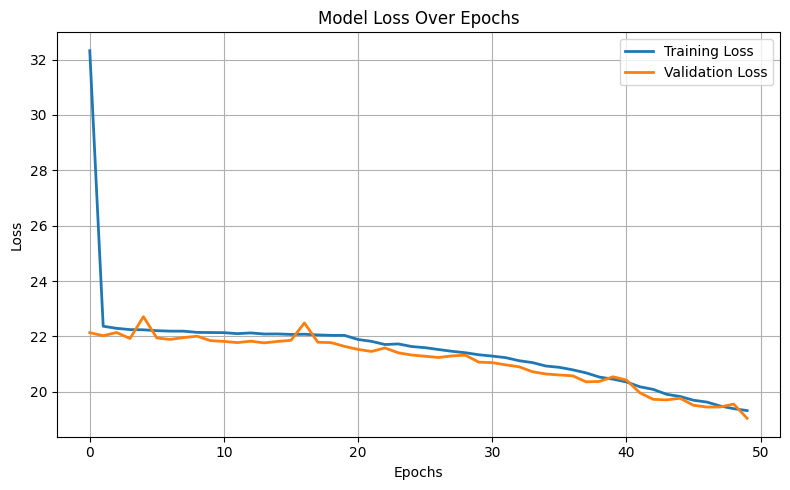

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Training Loss', linewidth=2)
plt.plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
plt.title('Model Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [14]:
model.fit(X_train_scaled, y_train, epochs=50, batch_size=64, validation_data=(X_test_scaled, y_test))

Epoch 1/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 16.5265 - val_loss: 16.6111
Epoch 2/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 16.6053 - val_loss: 16.8018
Epoch 3/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 16.5334 - val_loss: 16.3288
Epoch 4/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 16.3866 - val_loss: 16.8320
Epoch 5/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 16.3923 - val_loss: 16.4195
Epoch 6/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 16.3407 - val_loss: 16.6361
Epoch 7/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 16.3724 - val_loss: 16.4142
Epoch 8/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 16.2091 - val_loss: 16.1052
Epoch 9/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 16.2746 - val_loss: 16.9592
Epoch 10/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 16.2227 - val_loss: 16.3033
Epoch 11/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 16.1589 - val_loss: 16.2336
Epoch 12/50
832/832 ━━━━━━━━━━

In [15]:
import ipywidgets as widgets
from IPython.display import display, clear_output

import warnings
warnings.filterwarnings("ignore")

venue = widgets.Dropdown(options=df['venue'].unique().tolist(),description='Select Venue:')
batting_team = widgets.Dropdown(options =df['bat_team'].unique().tolist(),  description='Select Batting Team:')
bowling_team = widgets.Dropdown(options=df['bowl_team'].unique().tolist(),  description='Select Batting Team:')
striker = widgets.Dropdown(options=df['batsman'].unique().tolist(), description='Select Striker:')
bowler = widgets.Dropdown(options=df['bowler'].unique().tolist(), description='Select Bowler:')

predict_button = widgets.Button(description="Predict Score")

def predict_score(b):
    with output:
        clear_output()  # Clear the previous output


        # Decode the encoded values back to their original values
        decoded_venue = venue_encoder.transform([venue.value])
        decoded_batting_team = batting_team_encoder.transform([batting_team.value])
        decoded_bowling_team = bowling_team_encoder.transform([bowling_team.value])
        decoded_striker = striker_encoder.transform([striker.value])
        decoded_bowler = bowler_encoder.transform([bowler.value])


        input = np.array([decoded_venue,  decoded_batting_team, decoded_bowling_team,decoded_striker, decoded_bowler])
        input = input.reshape(1,5)
        input = scaler.transform(input)
        #print(input)
        predicted_score = model.predict(input)
        predicted_score = int(predicted_score[0,0])

        print(predicted_score)

In [18]:
predict_button.on_click(predict_score)
output = widgets.Output()
display(venue, batting_team, bowling_team, striker, bowler, predict_button, output)

Dropdown(description='Select Venue:', index=1, options=('M Chinnaswamy Stadium', 'Punjab Cricket Association S…

Dropdown(description='Select Batting Team:', index=1, options=('Kolkata Knight Riders', 'Chennai Super Kings',…

Dropdown(description='Select Batting Team:', index=3, options=('Royal Challengers Bangalore', 'Kings XI Punjab…

Dropdown(description='Select Striker:', index=8, options=('SC Ganguly', 'BB McCullum', 'RT Ponting', 'DJ Husse…

Dropdown(description='Select Bowler:', index=3, options=('P Kumar', 'Z Khan', 'AA Noffke', 'JH Kallis', 'SB Jo…

Button(description='Predict Score', style=ButtonStyle())

Output()

In [ ]:
model.save("ipl_score_predictor.h5")


In [ ]:
import joblib

# Assuming these are already created/fitted:
# scaler, venue_encoder, batting_team_encoder, bowling_team_encoder, striker_encoder, bowler_encoder

# Save scaler
joblib.dump(scaler, 'scaler.pkl')

# Save encoders
joblib.dump(venue_encoder, 'venue_encoder.pkl')
joblib.dump(batting_team_encoder, 'batting_team_encoder.pkl')
joblib.dump(bowling_team_encoder, 'bowling_team_encoder.pkl')
joblib.dump(striker_encoder, 'striker_encoder.pkl')
joblib.dump(bowler_encoder, 'bowler_encoder.pkl')

print("All scalers and encoders saved successfully.")


All scalers and encoders saved successfully.
